In [2]:
import sklearn
import pickle
import numpy as np
import pandas as pd
import math

In [3]:
day1 = pickle.load(open("./trainingdata2/result0103","rb"))
print(len(day1))
day2 = pickle.load(open("./trainingdata2/result0104","rb"))
print(len(day2))
day3 = pickle.load(open("./trainingdata2/result0105","rb"))
print(len(day3))
day4 = pickle.load(open("./trainingdata2/result0106","rb"))
print(len(day4))
day5 = pickle.load(open("./trainingdata2/result0107","rb"))
print(len(day5))
day6 = pickle.load(open("./trainingdata2/result0108","rb"))
print(len(day6))
day7 = pickle.load(open("./trainingdata2/result0109","rb"))
print(len(day7))
nodedict = pickle.load(open("./NodePosition", "rb"))
DistanceDict = pickle.load(open("./DijShortestPathLength", "rb"))

292605
304191
330108
336172
352513
378576
392923


In [53]:
def data_processor(data):
    num_veh = []
    daytype = []
    time = []
    pulon = []
    pulat = []
    dolon = []
    dolat = []
    distance = []
    shared = []
    
    for r in data:
        try:
            p_lon = nodedict[r.PuHub][0]
            p_lat = nodedict[r.PuHub][1]
            d_lon = nodedict[r.DoHub][0]
            d_lat = nodedict[r.DoHub][1]
            dis = DistanceDict[r.PuHub][r.DoHub]
        
            time.append(r.RequestTime)
            pulon.append(p_lon)
            pulat.append(p_lat)
            dolon.append(d_lon)
            dolat.append(d_lat)
            distance.append(dis)
            
            if r.shared is True:
                shared.append(1)
            else:
                shared.append(0)
        except:
            pass
        
    d_rd = {'time': time, 'PickupLon':pulon, 'PickupLat':pulat, 'DropoffLon':dolon, 'DropoffLat':dolat,'Distance':distance, 'label':shared}
    df_rd = pd.DataFrame(d_rd,columns=['time','PickupLon','PickupLat','DropoffLon','DropoffLat','Distance','label'])
    #df_rd = pd.DataFrame(d_rd,columns=['time','PickupLon','PickupLat','DropoffLon','DropoffLat','Distance','label'])    
    return df_rd
     



    

In [54]:
def time_classify(w,time):
    if w == 0:
        if time < 7200:
            return 2
        elif time < 4*3600:
            return 1
        elif time < 8*3600:
            return 0
        elif time < 12*3600:
            return 1
        else:
            return 2
    else:
        if time < 6*3600:
            return 0
        elif time < 8*3600:
            return 1
        elif time < 10*3600:
            return 2
        elif time < 17*3600:
            return 1
        elif time < 21*3600:
            return 2
        else:
            return 1
        

In [55]:
df_day1 = data_processor(day1)
df_day2 = data_processor(day2)
df_day3 = data_processor(day3)
df_day4 = data_processor(day4)
df_day5 = data_processor(day5)
df_day6 = data_processor(day6)
df_day7 = data_processor(day7)

In [128]:
from sklearn.model_selection import train_test_split
df_td1 = df_day1.sample(frac=0.8, random_state =100)
df_td2 = df_day2.sample(frac=0.8, random_state =100)
df_td3 = df_day3.sample(frac=0.8, random_state=100)
df_td4 = df_day4.sample(frac=0.8, random_state =100)
df_td5 = df_day5.sample(frac=0.8, random_state =100)
df_td6 = df_day6.sample(frac=0.8, random_state=100)
df_td7 = df_day7.sample(frac=0.8, random_state=100)
df_ml = pd.concat([df_td1,df_td2,df_td3,df_td4,df_td5,df_td6,df_td7])
print(len(df_ml))

#df_train = df_ml.sample(frac = 0.7, random_state = 100)
#df_test=df_ml.drop(df_train.index)
df_train,df_test = train_test_split(df_ml, test_size = 0.3, random_state=66)
print(len(df_train))
print(len(df_test))


X_train = df_train.values[:,0:6]
Y_train = df_train.values[:,6]
X_test = df_test.values[:,0:6]
Y_test = df_test.values[:,6]

1908868
1336207
572661


In [133]:
df_train = df_ml.sample(frac=0.7,random_state=100)
df_test=df_ml.sample(frac=0.3,random_state=100)

X_train = df_train.values[:,0:6]
Y_train = df_train.values[:,6]
X_test = df_test.values[:,0:6]
Y_test = df_test.values[:,6]

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.externals import joblib

In [144]:
DT_gini = DecisionTreeClassifier(criterion="gini",max_depth=22,random_state=100)
DT_gini.fit(X_train,Y_train)

y_pred = DT_gini.predict(X_test)

print ("Accuracy is ", accuracy_score(Y_test,y_pred)*100)

y_auc = np.array(Y_test)
pred_auc = np.array(y_pred)
print(y_auc,pred_auc)
print(np.sum(y_pred))
print(np.sum(Y_test))
print(roc_auc_score(y_auc, pred_auc))


Accuracy is  93.57000663570007
[1. 1. 1. ... 1. 1. 1.] [1. 1. 1. ... 1. 1. 1.]
533565.0
507847.0
0.7533013179558935


In [141]:
TP = 0
FN = 0
FP = 0
TN = 0
for t in range(len(y_pred)):
    if y_pred[t] == 1 and Y_test[t] == 1:
        TP += 1
    if y_pred[t] == 1 and Y_test[t] == 0:
        FP += 1
    if y_pred [t] == 0 and Y_test[t] == 0:
        TN += 1
    if y_pred [t] == 0 and Y_test[t] == 1:
        FN += 1
print(TP,FN,FP,TN)
print(TP/(TP+FN))
print(FP/(FP+TN))

502295 5552 31270 33543
0.989067573501468
0.48246493758968106


In [69]:
pro = DT_gini.predict_proba(X_test)
print(pro)
count1 = 0
count2 = 0
for p in pro:
    count1 += p[0]
    count2 += p[1]
print(count1, count2)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
67637.66666666607 505023.33333332924


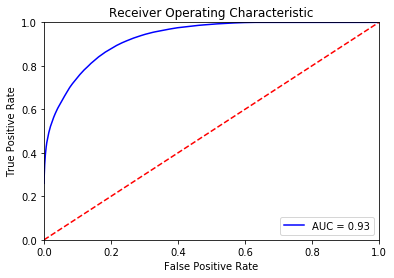

In [143]:
from sklearn import metrics
probs = DT_gini.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
%matplotlib inline 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
joblib.dump(DT_gini,"./model/dt_test")

['/Users/jasonsun/PycharmProjects/untitled/finalproject/model/dt_test']

In [71]:
print(X_test[2])

[ 8.51700000e+04 -7.39817975e+01  4.07580163e+01 -7.39304732e+01
  4.07947740e+01  8.53648500e+03]


In [39]:
df_shared1 = df_day1[df_day1.label == 1]
print(len(df_shared1))
df_unshared1 = df_day1.drop(df_shared1.index)
print(len(df_unshared1))

df_shared2 = df_day2[df_day2.label == 1]
print(len(df_shared2))
df_unshared2 = df_day2.drop(df_shared2.index)
print(len(df_unshared2))

df_shared = pd.concat([df_shared1,df_shared2])
df_unshared = pd.concat([df_unshared1,df_unshared2])
print(len(df_shared),len(df_unshared))

127092
16811
136182
17239
263274 34050


In [60]:
df_shared_use = df_shared.sample(frac = 1,random_state = 200)
df_combine = pd.concat([df_shared_use, df_unshared])

In [61]:
print(len(df_combine))

297324


In [62]:
df_train2=df_combine

X_train2 = df_train2.values[:,0:5]
Y_train2 = df_train2.values[:,6]
X_test2 = df_day3.values[:,0:5]
Y_test2 = df_day3.values[:,6]
print(len(X_test2))

156579


In [63]:
DT_gini = DecisionTreeClassifier(criterion="gini" , max_depth=75, min_samples_leaf=2, min_samples_split=4, random_state=100)
DT_gini.fit(X_train2,Y_train2)

y_pred = DT_gini.predict(X_test2)

print ("Accuracy is ", accuracy_score(Y_test2,y_pred)*100)

y_auc = np.array(Y_test2)
pred_auc = np.array(y_pred)
print(np.sum(y_pred))
print(np.sum(Y_test2))
print(roc_auc_score(y_auc, pred_auc))

Accuracy is  83.82733316728297
134438.0
139767.0
0.6478556456458403
